# **Prediction using Supervised ML**

### *To predicted the student’s score based on the number of hours studied.*

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [38]:
df = pd.read_csv('student_scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [40]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


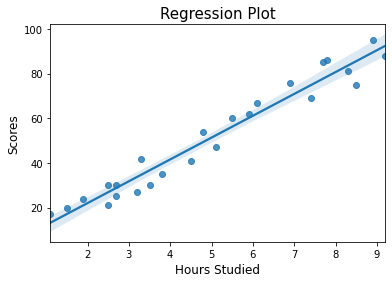

In [41]:
sns.regplot(x = df['Hours'], y = df['Scores'])
plt.title('Regression Plot', size = 15)
plt.ylabel('Scores', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

In [42]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [43]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

In [44]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [45]:
compare_scores = pd.DataFrame({'Actual Scores': val_y, 'Predicted Scores': pred_y})
compare_scores

,Actual Scores,Predicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


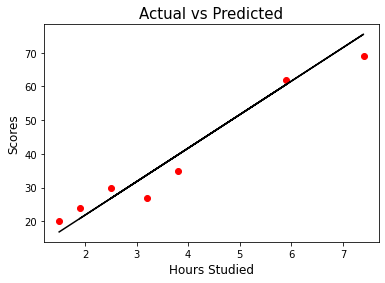

In [46]:
plt.scatter(x = val_X, y = val_y, color = 'red')
plt.plot(val_X, pred_y, color = 'Black')
plt.title('Actual vs Predicted', size = 15)
plt.ylabel('Scores', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

In [47]:
print('Mean Absolute Error:', mean_absolute_error(val_y,pred_y))

Mean Absolute Error: 4.130879918502486


In [48]:
print('R-Square:', r2_score(val_y,pred_y))

R-Square: 0.9367661043365055


In [49]:
hour = [9.25]
score = regression.predict([hour])
print("Score = {}".format(round(score[0],2)))

Score = 93.89
